Shar Clark

We have been asked to use our hypothesis testing skills to answer the following questions:

- Q1. Do smokers have higher insurance charges than non-smokers?
- Q2. Are men more likely to smoke than women?
- Q3. Do different regions have different charges, on average?

For each question, make sure to:

1. State your Null Hypothesis and Alternative Hypothesis
2. Select the correct test according to the data type and number of samples
3. Test the assumptions of your selected test.
4. Execute the selected test, or the alternative test (if you do not meet the assumptions)
5. Interpret your p-value and reject or fail to reject your null hypothesis 
6. Show a supporting visualization that helps display the result

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
df = pd.read_csv('Data/insurance - insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Q1. Do smokers have higher insurance charges than non-smokers?
1. State your Null Hypothesis and Alternative Hypothesis:
    - ***Null Hypothesis***: smokers will not have higher charges than non-smokers
    - ***Alternative Hypothesis***: smokers have higher insurance charges than non-smokers.

2. Select the correct test according to the data type and number of samples
    - Independent T Test - There are 1338 samples or 2 groups. This is also categorical.
3. Test the assumptions of your selected test.
    - No significant outliers
    - Normality
    - Equal Variance
4. Execute the selected test, or the alternative test (if you do not meet the assumptions)
    - ran below
5. Interpret your p-value and reject or fail to reject your null hypothesis 
    - P value:2.575322662587431e-104
    - Our Welch's T-test returned a p value less than .05. We reject the null hypothesis and support the alt hypothesis 
6. Show a supporting visualization that helps display the result
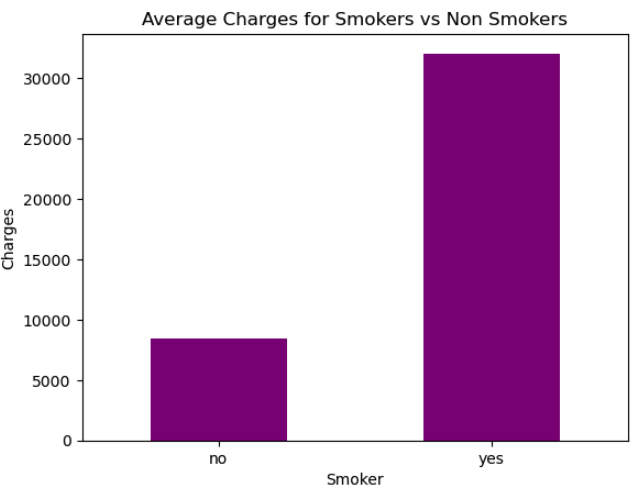


    


In [6]:
#separate data into two groups
smokers_df = df.loc[df['smoker'] == 'yes']
non_smokers_df = df.loc[df['smoker'] == 'no']
smokers_df.info()
non_smokers_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 274 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       274 non-null    int64  
 1   sex       274 non-null    object 
 2   bmi       274 non-null    float64
 3   children  274 non-null    int64  
 4   smoker    274 non-null    object 
 5   region    274 non-null    object 
 6   charges   274 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 17.1+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1064 entries, 1 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1064 non-null   int64  
 1   sex       1064 non-null   object 
 2   bmi       1064 non-null   float64
 3   children  1064 non-null   int64  
 4   smoker    1064 non-null   object 
 5   region    1064 non-null   object 
 6   charges   1064 non-null   float64
dtypes: float64(2), int6

In [7]:
#visualize group mean
#concat the two for visualizations
plot_df = pd.concat([non_smokers_df,smokers_df], axis=0)
plot_df.head(2)

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


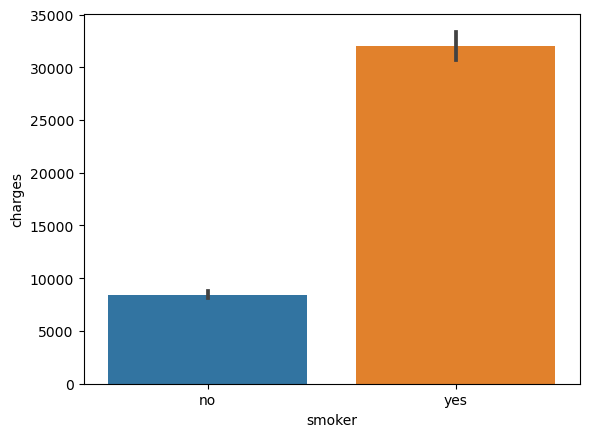

In [8]:
ax  = sns.barplot(data = plot_df, x= 'smoker', y = 'charges')

In [9]:
# save groups as series to make workflow easier later on

smokers_group = smokers_df['charges']
non_smokers_group = non_smokers_df['charges']
display(smokers_group.head(), non_smokers_group.head())

0     16884.9240
11    27808.7251
14    39611.7577
19    36837.4670
23    37701.8768
Name: charges, dtype: float64

1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
5     3756.62160
Name: charges, dtype: float64

In [11]:
#test assumptions
import numpy as np

## outliers for smokers
is_outlier_smokers = np.abs(stats.zscore(smokers_group)) > 3
print(f'There are {is_outlier_smokers.sum()} outliers in discount group out of {len(smokers_group)}')

There are 0 outliers in discount group out of 274


In [12]:
#outliers for non-smokers
is_outlier_nonsmokers = np.abs(stats.zscore(non_smokers_group)) > 3
print(f'There are {is_outlier_nonsmokers.sum()} outliers in discount group out of {len(non_smokers_group)}')

There are 24 outliers in discount group out of 1064


In [13]:
non_smokers_group.loc[~is_outlier_nonsmokers]

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1040, dtype: float64

In [15]:
#removing outliers from has discount group
non_smokers_group = non_smokers_group.loc[~is_outlier_nonsmokers]
non_smokers_group.info()

<class 'pandas.core.series.Series'>
Int64Index: 1040 entries, 1 to 1336
Series name: charges
Non-Null Count  Dtype  
--------------  -----  
1040 non-null   float64
dtypes: float64(1)
memory usage: 16.2 KB


In [16]:
#went from 1064 to 1040. outliers were removed from the group that had them.

###Checking for Normality
#According to LP, since both groups have more than 15 subjects(n) we can safely ignore the assumption of normality

In [17]:
# equal variance

result = stats.levene(non_smokers_group, smokers_group)
print(result)
print(result.pvalue<.05)

LeveneResult(statistic=520.7468821724297, pvalue=2.4247238784347824e-97)
True


In [18]:
result = stats.ttest_ind(non_smokers_group, smokers_group, equal_var=False)
print(result)
result.pvalue <.05

Ttest_indResult(statistic=-33.732305987092516, pvalue=2.575322662587431e-104)


True

Final Conclusion

Our Welch's T-test return a p value less than .05. We reject the null hypothesis and support the alt hypothesis that there is a significant difference in quantity between discounted and non discounted products.
in order to know if they are funded significantly more or less, we look at the actual means of our final groups.

0.47943654572545824


False

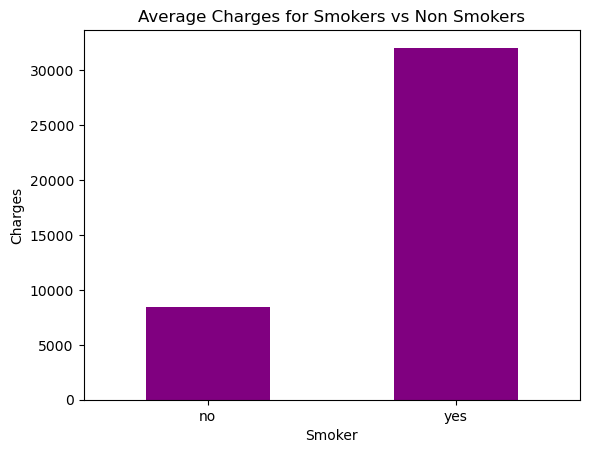

In [31]:
avg_chg = df.groupby('smoker')['charges'].mean()
avg_chg.plot(kind='bar', color = 'purple')
plt.title('Average Charges for Smokers vs Non Smokers')
plt.xlabel("Smoker")
plt.xticks(rotation='horizontal')
plt.ylabel("Charges")
plt.show()

# Q2. Are men more likely to smoke than women?
1. State your Null Hypothesis and Alternative Hypothesis:
    - ***Null Hypothesis***: Sex is not correlated to smokers
    - ***Alternative Hypothesis***: Men are more likely to smoke than women

2. Select the correct test according to the data type and number of samples
    - Chi-squared () test - There are 1338 samples or 2 groups
3. Test the assumptions of your selected test.
    - There are two categorical variables AND the outcomes are independent
4. Execute the selected test, or the alternative test (if you do not meet the assumptions)
    - ran below
5. Interpret your p-value and reject or fail to reject your null hypothesis 
    - 0.47943654572545824
    -  Since our P value is greater than alpha there is a significant difference between the groups.
6. Show a supporting visualization that helps display the result
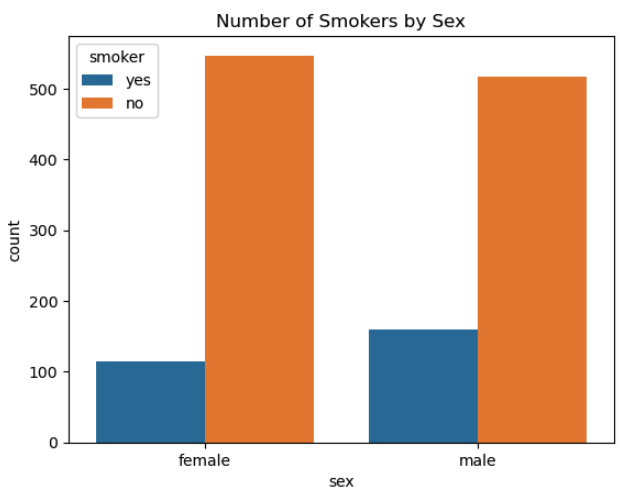

In [44]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [48]:
table2 = pd.crosstab(df['sex'], df['smoker'])
table2

smoker,no,yes
sex,,
female,547,115
male,517,159


In [49]:
# Run the Test and Save the Output
result2 = stats.chi2_contingency(table2)
chi2, p, deg_free, expected_vals = result #this labels the results

In [50]:
print(p)
p<.05

0.47943654572545824


False

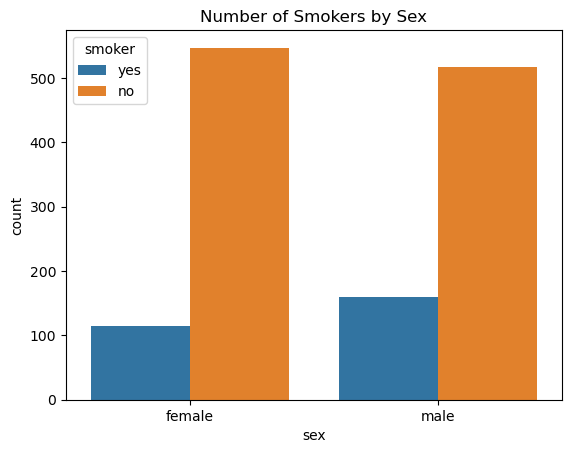

In [47]:
ax = sns.countplot(data=df, x='sex',hue='smoker',)
ax.set_title("Number of Smokers by Sex");


# Q3. Do different regions have different charges, on average?
1. State your Null Hypothesis and Alternative Hypothesis:
    - ***Null Hypothesis***: region does not have a correlation to charges
    - ***Alternative Hypothesis***: certain regions have higher/lower charges.

2. Select the correct test according to the data type and number of samples
    - ANOVA - There are 1338 samples or 4 groups
3. Test the assumptions of your selected test.
    - below
4. Execute the selected test, or the alternative test (if you do not meet the assumptions)
    - ran below
5. Interpret your p-value and reject or fail to reject your null hypothesis 
    - P value: .0008610590250786703
    - Southeast and southwest are the only two regions who have considerable differences from the other groups.
6. Show a supporting visualization that helps display the result
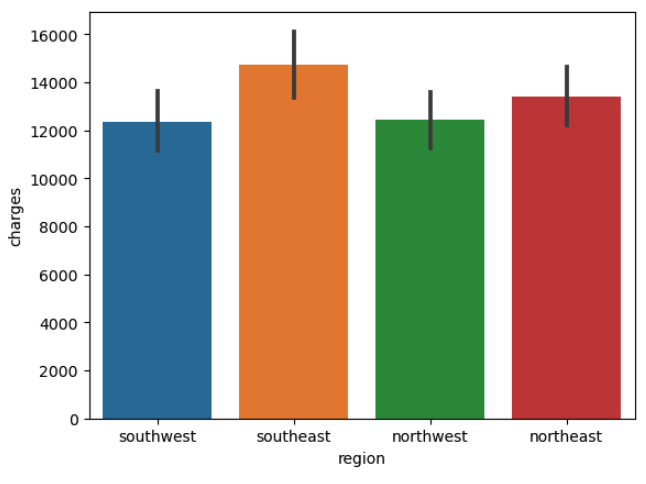

In [55]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [56]:
## Create groups dictionary. There are only 4 groups, but this is even more helpful when there are many groups
groups = {}

## Loop through all unique categories
for i in df['region'].unique():
    ## Get series for group and rename
    data = df.loc[df['region']==i,'charges'].copy()
    
    # save into the dictionary
    groups[i] = data
groups.keys()


dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

In [57]:
# testing assumptions
## Running normal test on each group and confirming there are >20 in each group
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df


,n,p,test stat
southwest,325.0,6.125298e-23,102.294059
southeast,364.0,4.953297e-15,65.877446
northwest,325.0,5.184209e-24,107.232850
northeast,324.0,1.455431e-19,86.747629


In [58]:
### checking sig with pandas 
norm_results_df['significant'] = norm_results_df['p'] < .05 
norm_results_df

,n,p,test stat,significant
southwest,325.0,6.125298e-23,102.294059,True
southeast,364.0,4.953297e-15,65.877446,True
northwest,325.0,5.184209e-24,107.232850,True
northeast,324.0,1.455431e-19,86.747629,True


In [59]:
stats.levene(*groups.values())

LeveneResult(statistic=5.559966758410606, pvalue=0.0008610590250786703)

In [61]:
result3 = stats.f_oneway(*groups.values())
result

(1338.0,
 0.47943654572545824,
 1336,
 array([[0.79521674, 0.20478326],
        [0.79521674, 0.20478326],
        [0.79521674, 0.20478326],
        ...,
        [0.79521674, 0.20478326],
        [0.79521674, 0.20478326],
        [0.79521674, 0.20478326]]))

In [62]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

## save the values as kg_lost and the labels to the Diet
values = df['charges']
labels = df['region']

In [63]:
## perform tukey's multiple comparison test and display the summary
tukeys_results = pairwise_tukeyhsd(values,labels)
tukeys_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
northeast,northwest,-988.8091,0.7245,-3428.9343,1451.3161,False
northeast,southeast,1329.0269,0.4745,-1044.9417,3702.9955,False
northeast,southwest,-1059.4471,0.6792,-3499.5723,1380.6781,False
northwest,southeast,2317.8361,0.0583,-54.1994,4689.8716,False
northwest,southwest,-70.638,0.9999,-2508.8826,2367.6066,False
southeast,southwest,-2388.4741,0.0477,-4760.5096,-16.4386,True


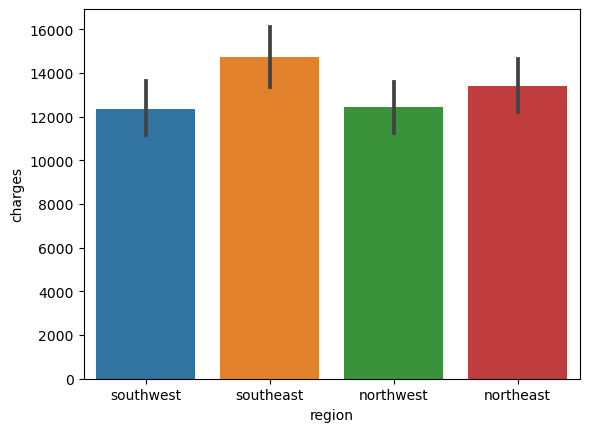

In [64]:
sns.barplot(data=df, x='region',y='charges');